In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

train_dir = '../data/processed/asl_alphabet_train_cropped/asl_alphabet_train'
test_dir = '../data/processed/asl_alphabet_test_cropped/asl_alphabet_test'

img_height = 150
img_width = 150
batch_size = 32

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

train_dir = '../data/raw/asl_alphabet_train/asl_alphabet_train'
test_dir = '../data/raw/asl_alphabet_test/asl_alphabet_test'

img_height = 150
img_width = 150
batch_size = 32

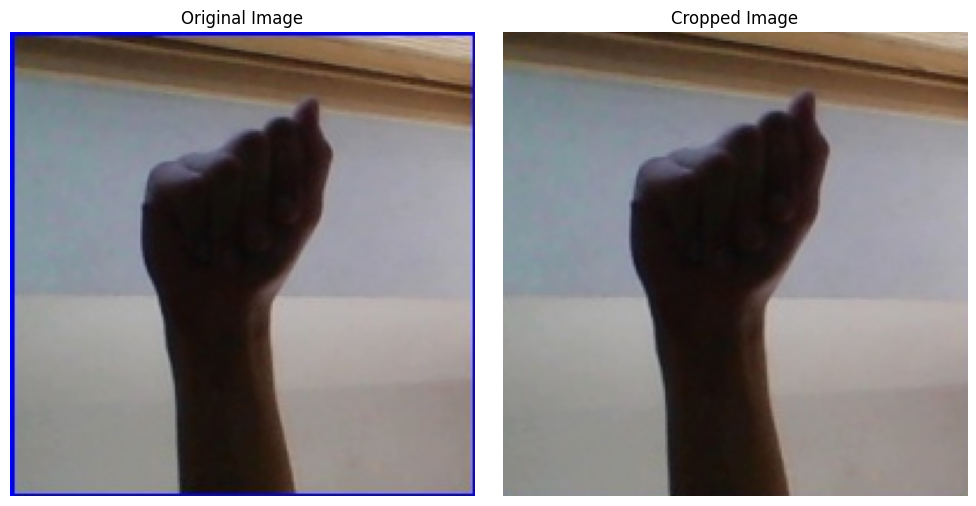

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to crop the blue border (assumed to be 4 pixels wide)
def crop_blue_border_simple(image):
    # Crop the image by removing 4 pixels from each side (top, bottom, left, right)
    cropped_image = image[4:-4, 4:-4]
    return cropped_image

# Load the image (replace with your actual image path)
image_path = '../data/raw/asl_alphabet_train/asl_alphabet_train/A/A1.jpg'
image = cv2.imread(image_path)

# Crop the blue border from the image
cropped_image = crop_blue_border_simple(image)

# Display the original and cropped images side by side for comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,        
    width_shift_range=0.2,    
    height_shift_range=0.2,   
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,     
    fill_mode='nearest',      
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0 
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 28 images belonging to 28 classes.


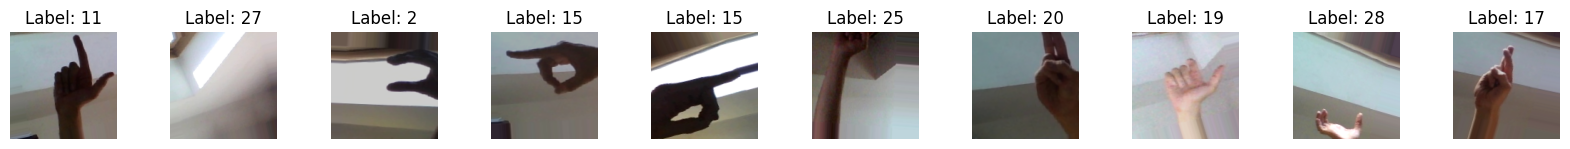

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images from the training generator
batch_images, batch_labels = next(train_generator)

# Define how many images you want to preview
num_images = 10

# Set up the plot for displaying the images
fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
axes = axes.ravel()

for i in np.arange(0, num_images):
    # Get the image (we reverse normalization for display purposes)
    image = batch_images[i] * 255.0  # Undo the normalization
    image = np.clip(image, 0, 255).astype(np.uint8)  # Ensure pixel values are in the proper range
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {np.argmax(batch_labels[i])}")
    axes[i].axis('off')

# Show the plot
plt.subplots_adjust(wspace=0.5)
plt.show()
